B071

Bhavya Singhal

70022000199

BTech CE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


In [ ]:
df = pd.read_csv("/content/monthly-sunspots.csv", usecols=[1])

In [ ]:
df

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [ ]:
data_set = np.array(df.values.astype('float32'))
scaler = MinMaxScaler(feature_range=(0,1))
data_set = scaler.fit_transform(data_set).flatten()
data_set

array([0.22852638, 0.24665089, 0.2758077 , ..., 0.21985814, 0.13120566,
       0.13159968], dtype=float32)

In [ ]:
n = len(data_set)
n

2820

In [ ]:
split = int(0.8 * n)
train = data_set[0:split]
test = data_set[split:]

In [ ]:
split

2256

In [ ]:
len(train)

2256

In [ ]:
len(test)

564

In [ ]:
ncell = 12
yindex = np.arange(ncell-1, split, ncell)

In [ ]:
yindex

array([  11,   23,   35,   47,   59,   71,   83,   95,  107,  119,  131,
        143,  155,  167,  179,  191,  203,  215,  227,  239,  251,  263,
        275,  287,  299,  311,  323,  335,  347,  359,  371,  383,  395,
        407,  419,  431,  443,  455,  467,  479,  491,  503,  515,  527,
        539,  551,  563,  575,  587,  599,  611,  623,  635,  647,  659,
        671,  683,  695,  707,  719,  731,  743,  755,  767,  779,  791,
        803,  815,  827,  839,  851,  863,  875,  887,  899,  911,  923,
        935,  947,  959,  971,  983,  995, 1007, 1019, 1031, 1043, 1055,
       1067, 1079, 1091, 1103, 1115, 1127, 1139, 1151, 1163, 1175, 1187,
       1199, 1211, 1223, 1235, 1247, 1259, 1271, 1283, 1295, 1307, 1319,
       1331, 1343, 1355, 1367, 1379, 1391, 1403, 1415, 1427, 1439, 1451,
       1463, 1475, 1487, 1499, 1511, 1523, 1535, 1547, 1559, 1571, 1583,
       1595, 1607, 1619, 1631, 1643, 1655, 1667, 1679, 1691, 1703, 1715,
       1727, 1739, 1751, 1763, 1775, 1787, 1799, 18

In [ ]:
print(len(yindex))

188


In [ ]:
ytrain = train[yindex]

In [ ]:
ytrain[0]

0.33569738

In [ ]:
n_trainy = len(ytrain)

In [ ]:
n_trainy

188

In [ ]:
xtrain = train[range(ncell*n_trainy)]
xtrain = np.reshape(xtrain,(n_trainy, ncell,1))
test_y_index = np.arange(ncell-1, n-split, ncell)
test_y = test[test_y_index]
n_test_y = len(test_y)
test_x = test[range(ncell*n_test_y)]
test_x = np.reshape(test_x, (n_test_y, ncell,1))

In [ ]:
xtrain.shape

(188, 12, 1)

In [ ]:
test_x.shape

(47, 12, 1)

In [ ]:
test_y.shape

(47,)

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(ncell,1), activation='tanh'))
model.add(Dense(units=1, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(xtrain, ytrain, epochs=30, batch_size=1, verbose=2)

Epoch 1/30
188/188 - 4s - loss: 0.0659 - 4s/epoch - 23ms/step
Epoch 2/30
188/188 - 1s - loss: 0.0416 - 1s/epoch - 6ms/step
Epoch 3/30
188/188 - 1s - loss: 0.0340 - 1s/epoch - 6ms/step
Epoch 4/30
188/188 - 1s - loss: 0.0292 - 1s/epoch - 6ms/step
Epoch 5/30
188/188 - 1s - loss: 0.0246 - 1s/epoch - 6ms/step
Epoch 6/30
188/188 - 1s - loss: 0.0217 - 1s/epoch - 6ms/step
Epoch 7/30
188/188 - 1s - loss: 0.0194 - 1s/epoch - 6ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0172 - 1s/epoch - 6ms/step
Epoch 9/30
188/188 - 1s - loss: 0.0153 - 1s/epoch - 6ms/step
Epoch 10/30
188/188 - 1s - loss: 0.0140 - 1s/epoch - 6ms/step
Epoch 11/30
188/188 - 1s - loss: 0.0126 - 1s/epoch - 6ms/step
Epoch 12/30
188/188 - 1s - loss: 0.0114 - 1s/epoch - 6ms/step
Epoch 13/30
188/188 - 1s - loss: 0.0104 - 1s/epoch - 6ms/step
Epoch 14/30
188/188 - 1s - loss: 0.0092 - 1s/epoch - 6ms/step
Epoch 15/30
188/188 - 1s - loss: 0.0084 - 1s/epoch - 6ms/step
Epoch 16/30
188/188 - 1s - loss: 0.0074 - 1s/epoch - 6ms/step
Epoch 17/30
188/

In [ ]:
train_pred = model.predict(xtrain)
test_pred = model.predict(test_x)

In [ ]:
train_error = math.sqrt(mean_squared_error(ytrain, train_pred))
test_error = math.sqrt(mean_squared_error(test_y, test_pred))


In [ ]:
train_error

0.04252521170081502

In [ ]:
test_error

0.0726629495095616

In [ ]:
actual = np.append(ytrain, test_y)

In [ ]:
predicted = np.append(train_pred, test_pred)

In [ ]:
samples = len(actual)

Text(0.5, 1.0, 'Actual & Predicted sunspot')

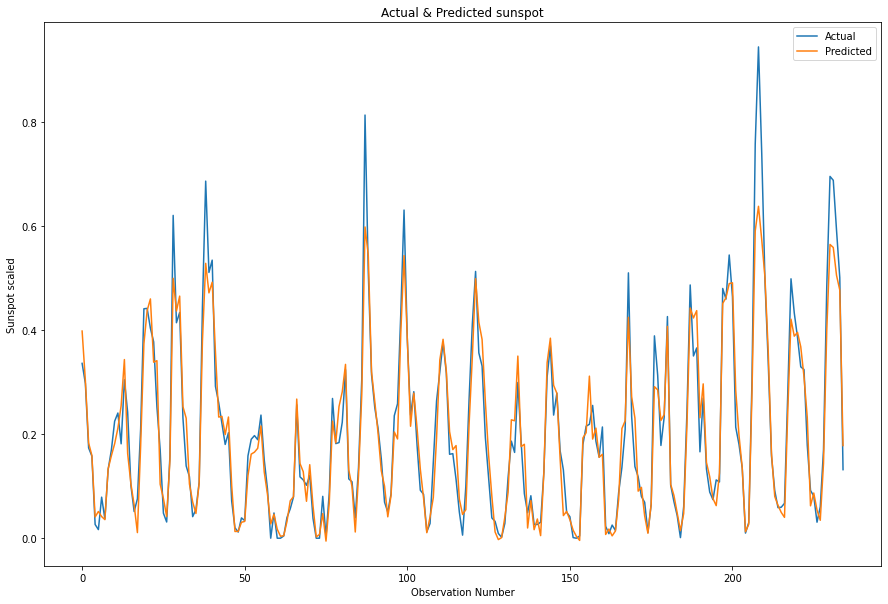

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(samples), actual)
plt.plot(range(samples), predicted)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Observation Number')
plt.ylabel('Sunspot scaled')
plt.title('Actual & Predicted sunspot')

**Conclusion:**

Simple RNN is used to predict sunspot every 12 months, 3 neurons are used in the hidden layer and last layer is fully connected layer. 

The output shows training error 0.042 (MSE) and test error 0.072 (MSE) and the graph shows the actual and predicted values are almost the same.